In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
# from utils import clustering as cl
from itertools import product

# Analysis

From comprehensive study depicted below it is possible to infer some clear clusters, we should highlight `k_means` and `hc_pca` which exhibit a better labelling, unlike `DBSCAN` whose optimized hyperparameters retrieves an overfitting on the data.

In [5]:
# Setting palettes
k_means = ["#009DDC", "#f26430", "#6761a8", "#009B72"]
hc = ["#44355B", "#221E22", "#ECA72C", "#EE5622"]

In [6]:
# Products data standard
products_data_standard = pd.read_csv("./datasets/products_data_standard.csv").iloc[:, 1:]

# Places data standard
places_data_standard = pd.read_csv("./datasets/places_data_standard.csv").iloc[:, 1:]

In [7]:
products_data_standard.iloc[:, :4].columns

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts'], dtype='object')

## Products purchase trends

Covariance among products purchase may lead to gathering a cluster based on age or any other consumer characteristic. We used `kmeans`, `Hierarchical Clustering`, and `DBSCAN` to fit our data and retrieve clusters on optimized hyperparameters.

TypeError: 'builtin_function_or_method' object is not subscriptable

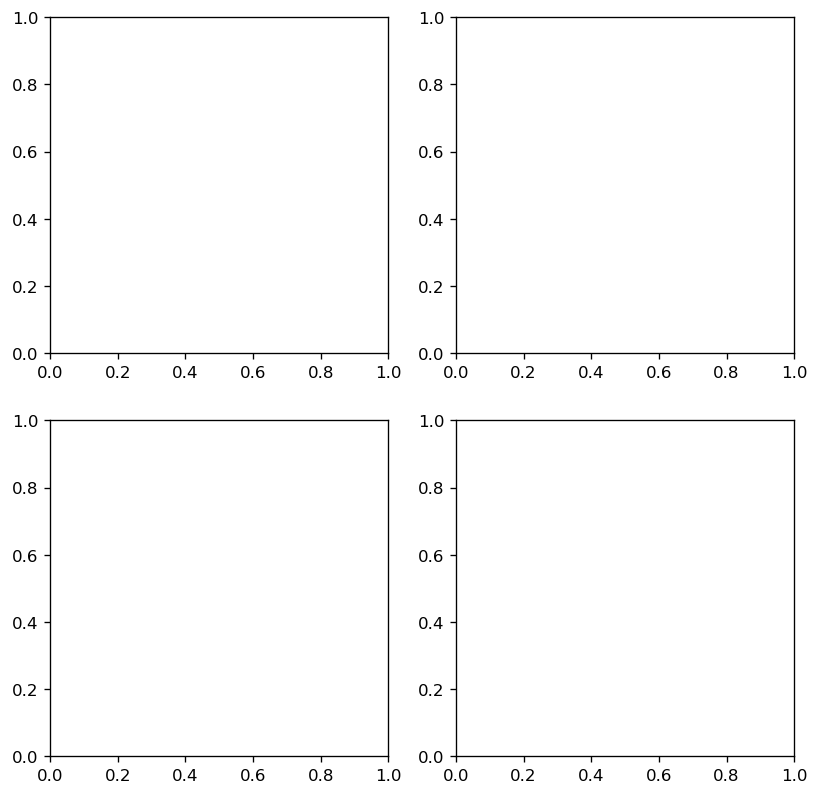

In [10]:
fig, axis = plt.subplots(2, 2, figsize=(8,8), dpi=120)
axis.flatten[0].plot(products_data_standard[])